In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data_challenge_stock_prices.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,100.071213,100.149491,99.930634,99.987755,100.029963,99.946339,99.978796,99.977380,100.100539,99.925212,...,99.929276,99.956589,100.043535,100.009331,99.971643,99.967958,100.055486,100.084689,99.936694,100.059513
1,100.038755,100.167643,99.939857,100.077193,100.051333,99.946010,100.037514,100.049019,99.976980,99.905657,...,99.945678,100.006483,100.014342,100.149302,100.075814,100.050963,100.051414,100.018748,99.957900,100.030354
2,100.101553,100.279549,100.008484,100.011744,100.129126,99.942141,100.117582,100.011918,99.835479,100.033813,...,100.021618,99.982290,100.014034,100.199551,100.158617,100.091338,99.971000,100.089312,99.974230,100.006611
3,100.139363,100.325915,100.014660,99.938794,100.165624,99.837089,100.114784,100.098861,99.974006,99.984087,...,100.067053,99.986941,100.010459,100.217967,100.178327,100.089753,100.010143,100.101545,99.969835,100.022341
4,100.165794,100.255047,99.986122,99.955508,100.248478,99.717540,99.924259,99.972593,99.785835,100.023051,...,100.067643,100.022269,99.893231,100.197641,100.163919,100.061149,99.994469,100.112062,99.972424,99.941994


## Classification of stocks into sectors 
Daily returns (percentage returns) for all the stocks are calculated. The stocks are classified on their basis - same sector, same movement of stock

In [2]:

cols = ["{}".format(i) for i in range(100)]
feature_df = df.diff()
# Calculate the returns for stocks
feature_df =  feature_df.dropna().reset_index()
feature_df = 10000*feature_df.div(df.iloc[:-1]) # converting to bps
feature_df = feature_df.iloc[:,:-1][cols]
feature_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-3.243471,1.812512,0.922893,8.944849,2.136390,-0.032911,5.873065,7.165518,-12.343510,-1.956949,...,1.641292,4.991535,-2.918023,13.995838,10.420115,8.303113,-0.407022,-6.588547,2.121928,-2.914142
1,6.277320,11.171837,6.866858,-6.539852,7.775306,-0.387129,8.003817,-3.708246,-14.153369,12.827682,...,7.598132,-2.419075,-0.030817,5.017393,8.273986,4.035428,-8.037210,7.055094,1.633632,-2.373573
2,3.777144,4.623667,0.617508,-7.294112,3.645098,-10.511269,-0.279485,8.693262,13.875542,-4.970944,...,4.542556,0.465192,-0.357382,1.837971,1.967886,-0.158318,3.915353,1.222218,-0.439611,1.572853
3,2.639490,-7.063785,-2.853390,1.672433,8.271676,-11.974408,-19.030688,-12.614383,-18.822024,3.897028,...,0.058922,3.533270,-11.721590,-2.028209,-1.438227,-2.857882,-1.567173,1.050696,0.259056,-8.032886
4,-13.279779,4.677175,0.620968,0.293601,2.594162,0.844500,3.809045,6.787439,4.988892,-8.294962,...,3.732373,-5.586531,-1.136868,3.516355,-4.277555,3.410985,3.352375,-0.152422,-3.799062,1.354278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,5.634481,0.694018,-0.953876,1.041865,-15.482196,2.763657,1.172729,-2.020669,-15.250634,4.263956,...,6.544657,-2.261948,-2.817896,2.056267,0.705278,3.765144,3.809245,2.470718,-1.801902,-0.489426
199995,-0.534429,-1.191175,-5.881040,-3.823665,6.609036,-8.111847,-9.778779,1.826013,-10.602809,-2.018449,...,4.551249,0.238264,-2.411330,3.346619,12.240852,-1.544637,6.798460,0.313421,-3.898518,5.028793
199996,3.301961,3.738474,-9.161957,-2.831439,2.974105,-1.107174,-4.800530,-16.393501,-6.239463,1.828966,...,-6.905347,-2.054038,0.841593,-0.298098,-1.923456,-9.267271,3.713912,-4.547518,-3.323349,-3.579217
199997,-4.785510,-1.514177,3.472440,-2.570937,-0.630911,2.079725,1.070490,4.103396,-11.872017,6.672996,...,-0.391296,-5.705750,-1.258358,4.692999,-6.806986,-1.902228,-3.922403,-5.657950,-3.495723,-0.941505


#### Heirarchical clustering is used to calculate the number of cluster. The features used are the returns vectors for all the 100 stocks

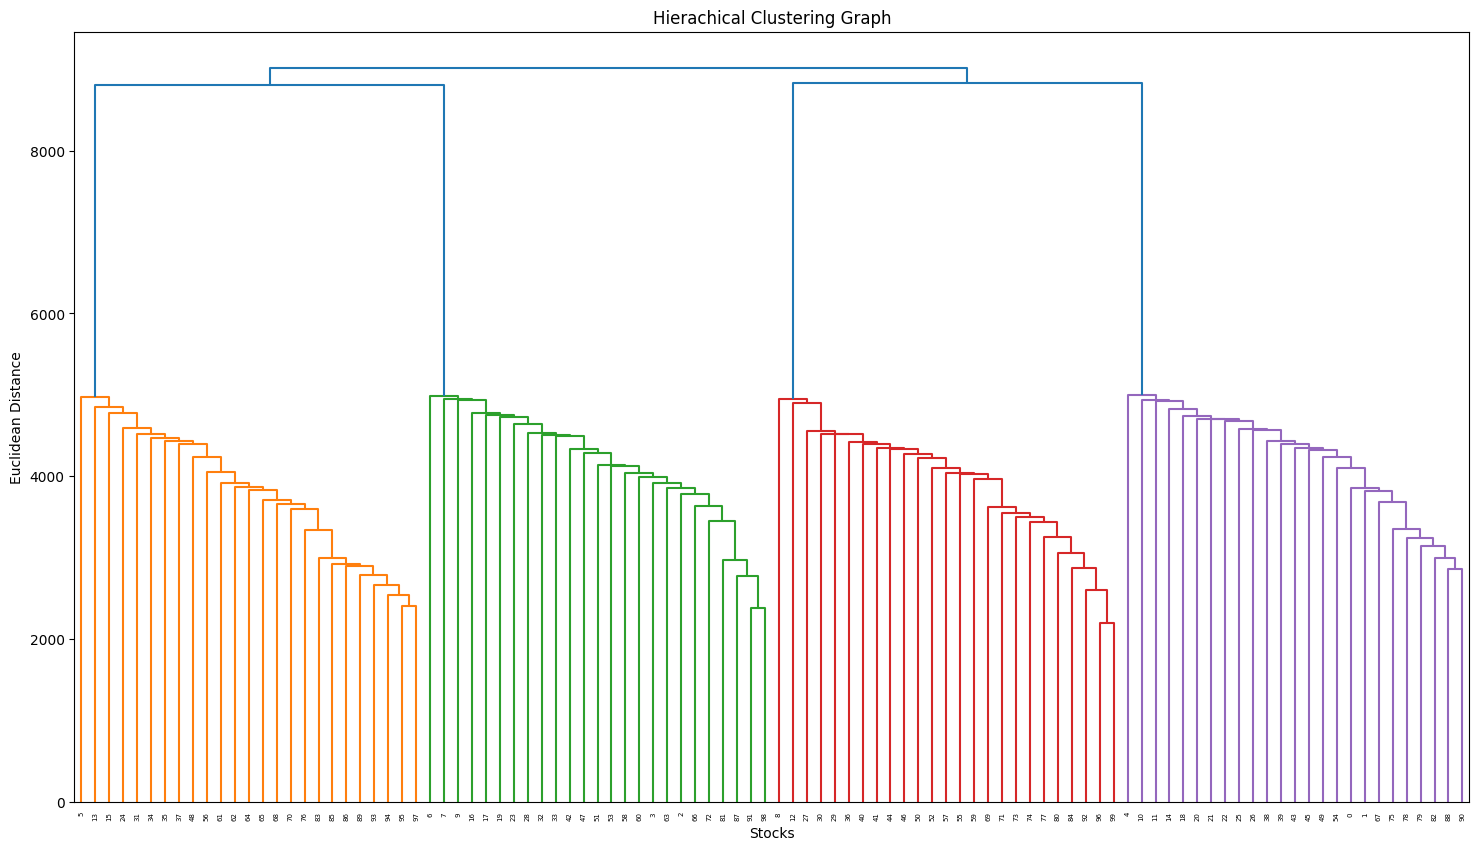

In [92]:
# Modeling
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hier
X = feature_df.T
plt.figure(figsize=(18,10))
heirachical_graph=hier.dendrogram(hier.linkage(X, method='ward')) #method='ward' uses the Ward variance minimization algorithm

# Add titles and labels
plt.title('Hierachical Clustering Graph')
plt.xlabel('Stocks')
plt.ylabel('Euclidean Distance')
plt.savefig("test.png")

The first eureka-voila moment!! Such good clustering!!

Silhoutte score is used to judge the number of clusters

**NOTE:** This may take some time to execute. Feel free to skip over it. This is done just for a sanity check

In [ ]:
# Silhouette Score for K means
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15),metric='silhouette', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Elbow method is another method to judge the correct number of clusters in the data

**NOTE:** This may take some time to execute. Feel free to skip over it. This is done just for a sanity check

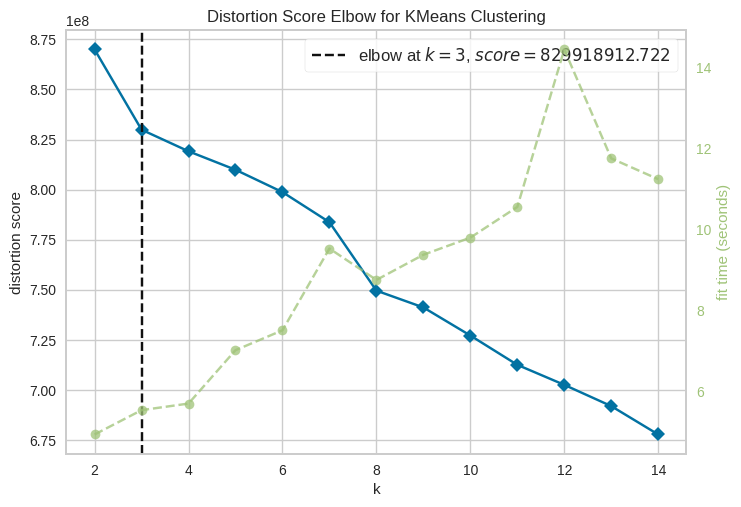

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method for K means
# Import ElbowVisualizer
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

#### Plotting the Silhoutte plot for k = 4 clusters, to judge whether to go with 3 or 4 clusters

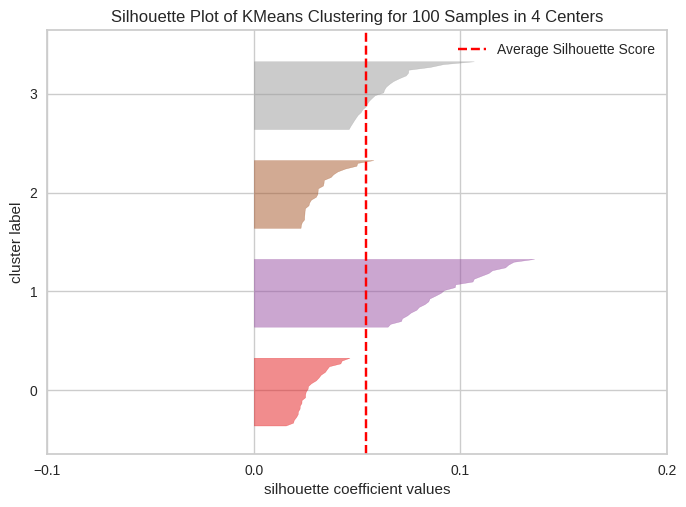

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 100 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(4))
model.fit(X)
model.show()

#### Plotting the Silhoutte plot for k = 3 clusters, to judge whether to go with 3 or 4 clusters

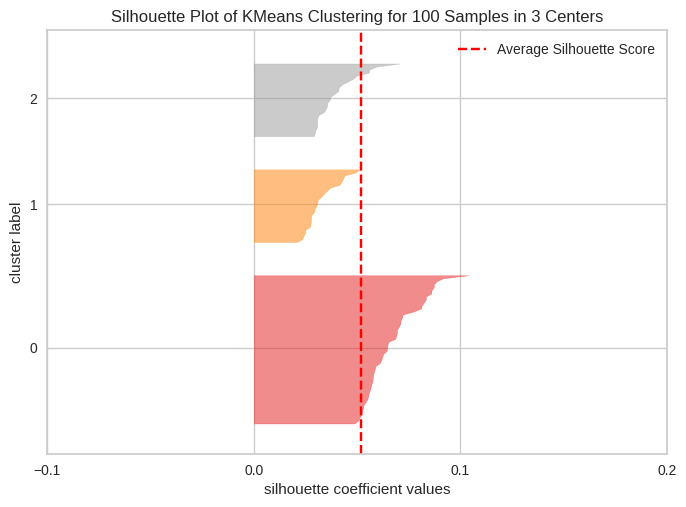

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 100 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
model = SilhouetteVisualizer(KMeans(3))
model.fit(X)
model.show()

### So.....4 sectors it is!!!

## Clustering the Stocks into Sectors

In [6]:
from sklearn.cluster import AgglomerativeClustering
clustering4 = AgglomerativeClustering(n_clusters=4).fit(X)

In [ ]:
clustering4.labels_

array([0, 0, 1, 1, 0, 3, 1, 1, 2, 1, 0, 0, 2, 3, 0, 3, 1, 1, 0, 1, 0, 0,
       0, 1, 3, 0, 0, 2, 1, 2, 2, 3, 1, 1, 3, 3, 2, 3, 0, 0, 2, 2, 1, 0,
       2, 0, 2, 1, 3, 0, 2, 1, 2, 1, 0, 2, 3, 2, 1, 2, 1, 3, 3, 1, 3, 3,
       1, 0, 3, 2, 3, 2, 1, 2, 2, 0, 3, 2, 0, 0, 2, 1, 0, 3, 2, 3, 3, 1,
       0, 3, 0, 1, 2, 3, 3, 3, 2, 3, 1, 2])

Our second eureka-voila moment!! Such perfect clustering!!!

(array([25.,  0.,  0., 25.,  0.,  0., 25.,  0.,  0., 25.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

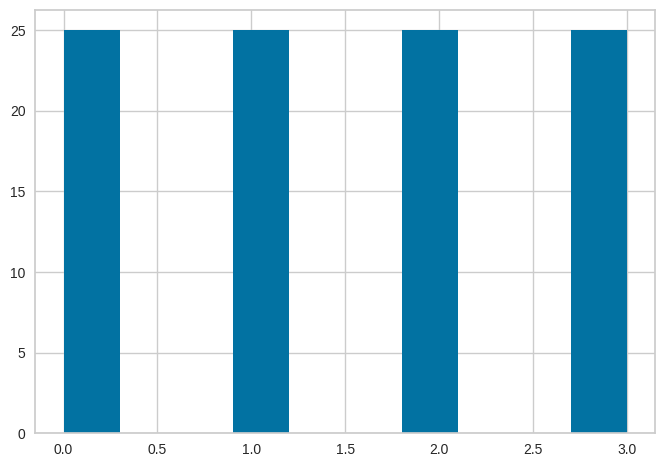

In [ ]:
plt.hist(clustering4.labels_)

The following is just done as a sanity check - whenever the number of clusters are increased to any number above 4 (say, 5), Agglomerative Clustering tries to assign majority samples to 4 

buckets, with little number of samples in the rest. So, our guess is we are on the right track!!

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering5 = AgglomerativeClustering(n_clusters=5).fit(X)

In [ ]:
clustering5.labels_

array([3, 3, 0, 0, 4, 1, 0, 0, 2, 0, 3, 3, 2, 1, 3, 1, 0, 0, 3, 0, 3, 3,
       3, 0, 1, 3, 3, 2, 0, 2, 2, 1, 0, 0, 1, 1, 2, 1, 3, 3, 2, 2, 0, 3,
       2, 3, 2, 0, 1, 3, 2, 0, 2, 0, 3, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1,
       0, 3, 1, 2, 1, 2, 0, 2, 2, 3, 1, 2, 3, 3, 2, 0, 3, 1, 2, 1, 1, 0,
       3, 1, 3, 0, 2, 1, 1, 1, 2, 1, 0, 2])

(array([25.,  0., 25.,  0.,  0., 25.,  0., 24.,  0.,  1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

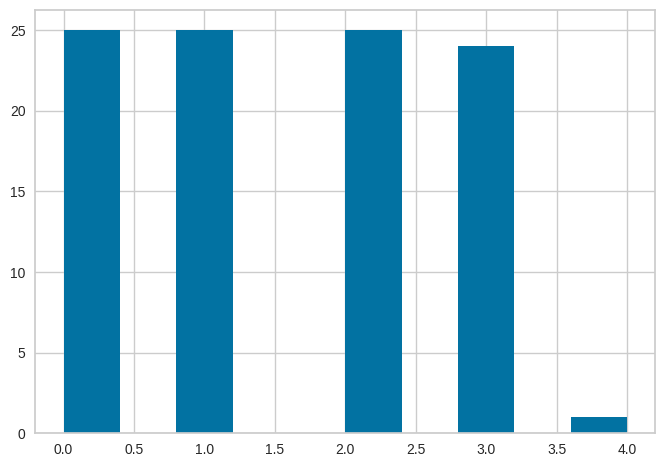

In [ ]:
plt.hist(clustering5.labels_)

## Solving for Indices

In [4]:
indices = pd.read_csv('data_challenge_index_prices.csv')
indices = indices.iloc[1:].reset_index(drop=True)
indices.columns=range(15)
indices

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,99.975796,99.985596,100.022475,100.078519,100.013440,100.011502,100.047425,100.007369,100.016088,99.987503,100.038767,99.980429,99.993460,100.009418,100.022492
1,99.997414,99.981548,100.026134,100.065001,100.022266,100.015162,100.059273,99.994968,100.027710,100.003425,100.007231,99.990979,99.995741,100.036443,100.012029
2,100.008660,99.981617,100.020906,100.066070,100.035164,100.031895,100.013100,99.988995,100.024536,99.968714,100.021550,99.985776,99.991648,100.016424,100.006798
3,100.054803,99.975288,100.015679,100.043006,100.001001,100.026665,99.952952,99.980704,100.011436,99.982931,100.005479,99.983636,99.993578,100.020985,100.017259
4,100.059993,99.969435,100.019338,100.065751,100.002613,100.021436,99.978224,99.992698,100.015769,100.009597,100.001119,99.981541,99.997606,99.997937,100.012028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,99.303701,99.959589,91.653255,98.858822,99.306801,163.595854,99.205965,99.941469,99.940839,98.667208,98.835423,99.657781,99.721746,99.581835,126.918880
199995,99.296075,99.944255,91.656609,98.876476,99.310740,163.577893,99.187132,99.938550,99.936910,98.730949,98.845056,99.654300,99.656761,99.600811,126.912241
199996,99.285675,99.946619,91.646549,98.871689,99.278670,163.587300,99.209836,99.935240,99.945365,98.770884,98.787822,99.643536,99.657794,99.619792,126.933483
199997,99.271544,99.940909,91.631221,98.804727,99.254376,163.614668,99.202394,99.941546,99.944428,98.795148,98.805565,99.644434,99.648860,99.618761,126.954729


### Dividing the stocks into sectors

In [7]:
sector=[None for i in range(4)]
for i in range(4):
    sector[i]=feature_df.loc[:, clustering4.labels_==i]

## Fitting the Index returns

The current strategy of fitting the index returns uses Polynomial Regression (with polynomial fetures upto a degree 3), to fit the function taking inputs $r^1_t, r^2_t ... r^m_t$ for returns on day t, belonging to some sector; and the return $R^{I_i}_t$ for some index i, and day t. The plot for every pair of index i, and sector j is plotted below, along with the predictive correlation in the title (abbreviated as PC). For a given index, the sector with the highest predictive correlation was chosen.

The reason behind the polynomial functional form of the regression function is:

1. When we did PCA on the m-dimensional vectors (m = number of stocks in a sector), which essentially means converting the data to 1 dimension. on plotting a scatter plot of the corresponding $x_i$'s (reduced dimensional variables) and the value of indices (corresponding to the $x_i$ on the same day), we found that the plot did not have a linear correlation between the inputs and the output of the indices. We concluded that linear regression would not be ideal for this case.

2. So, the functional form of f() would have to be non linear. We tried fitting the data by Polynomial Regression (as stated above) along with Lasso regression to prevent overfitting of the data. 

3. Also, MSE error is used to account for the Gaussian Random error $\epsilon$

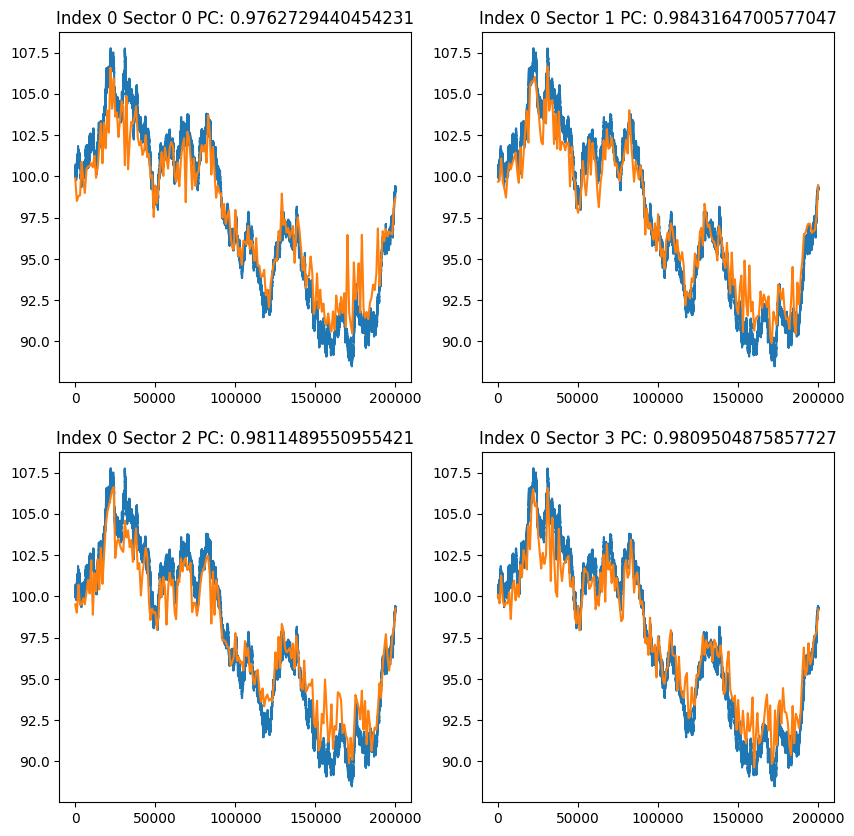

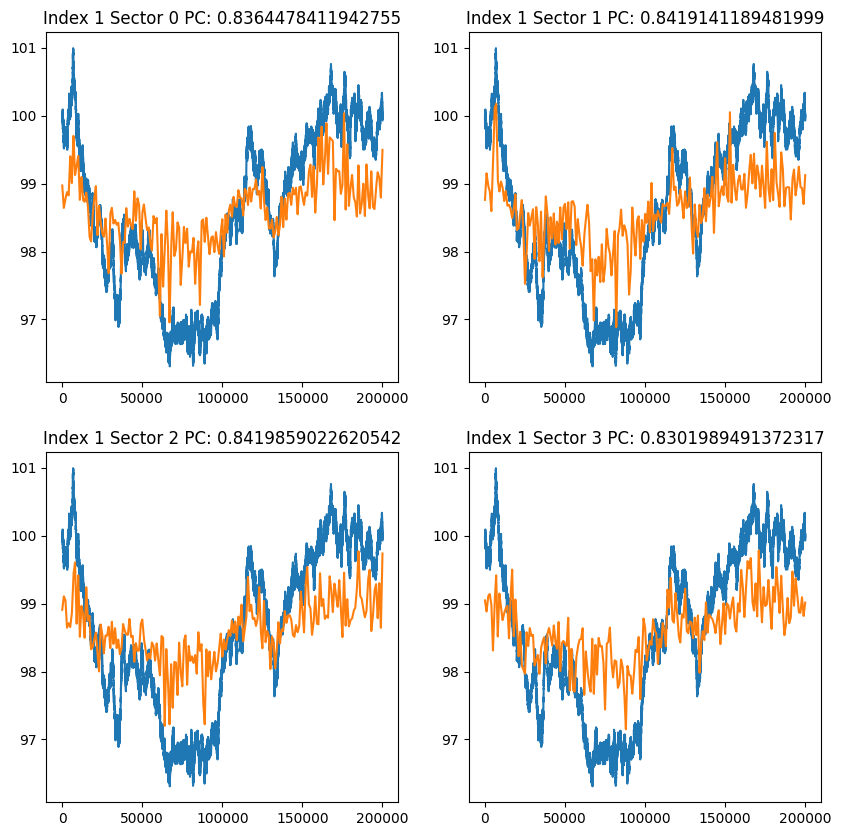

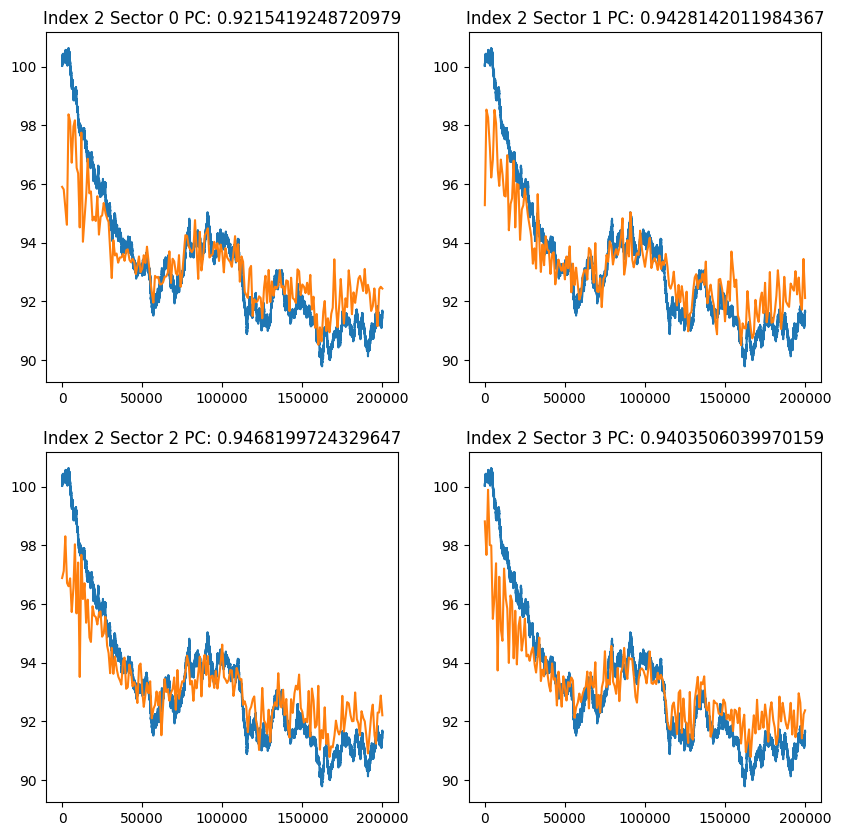

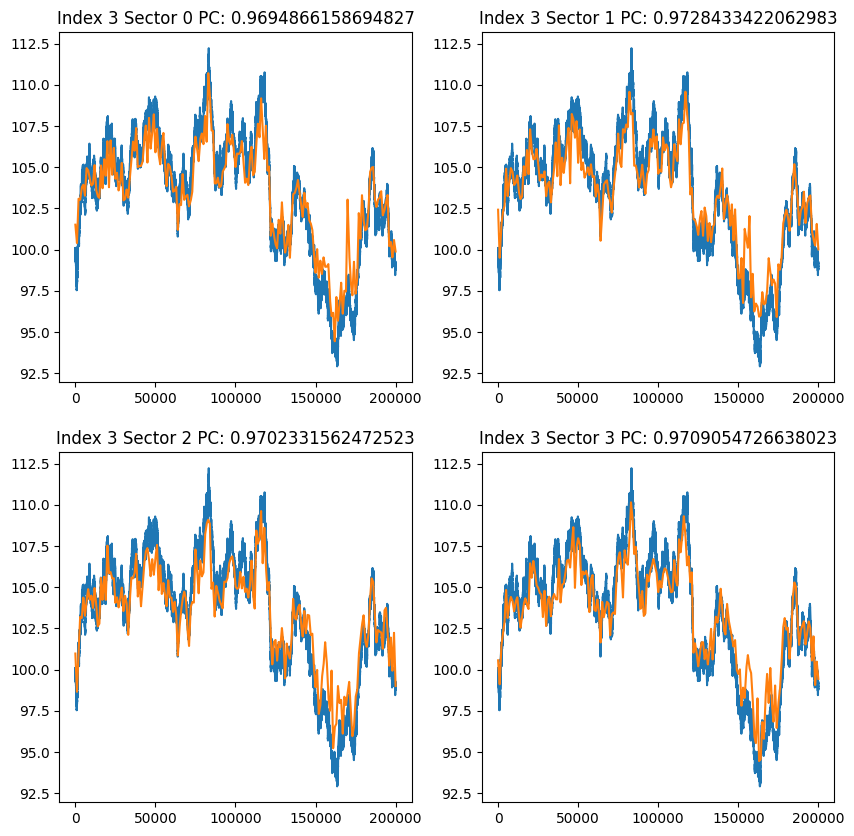

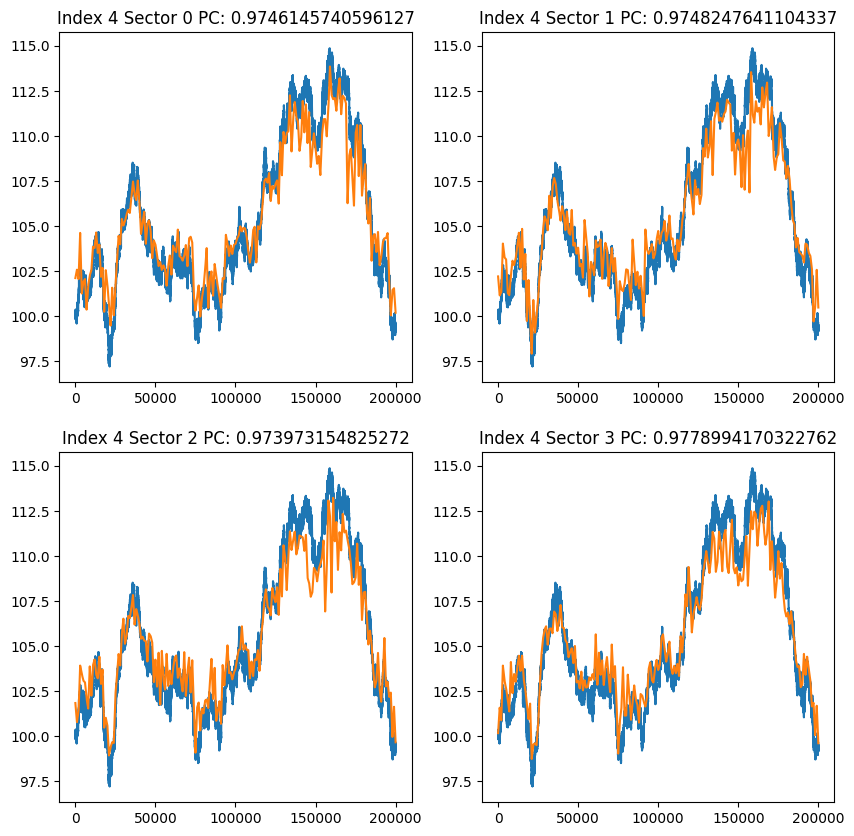

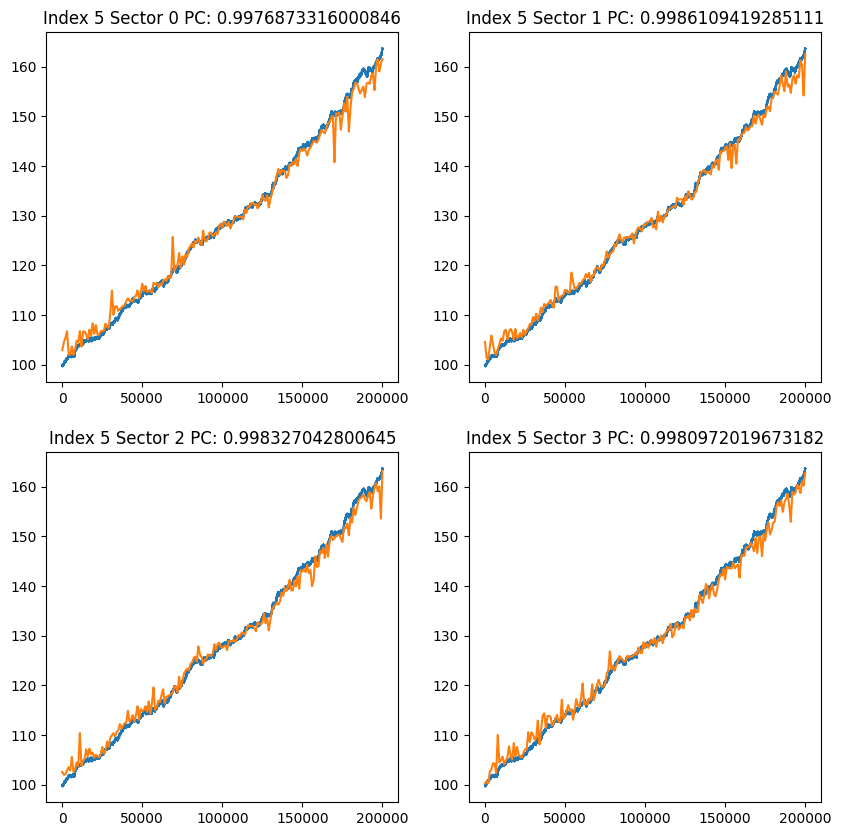

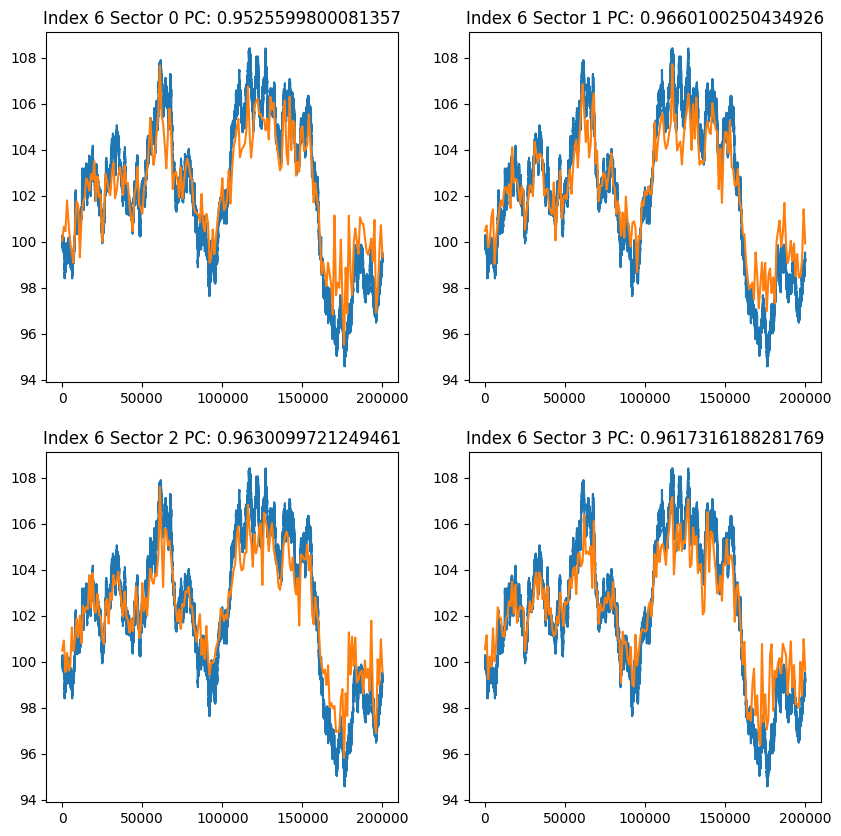

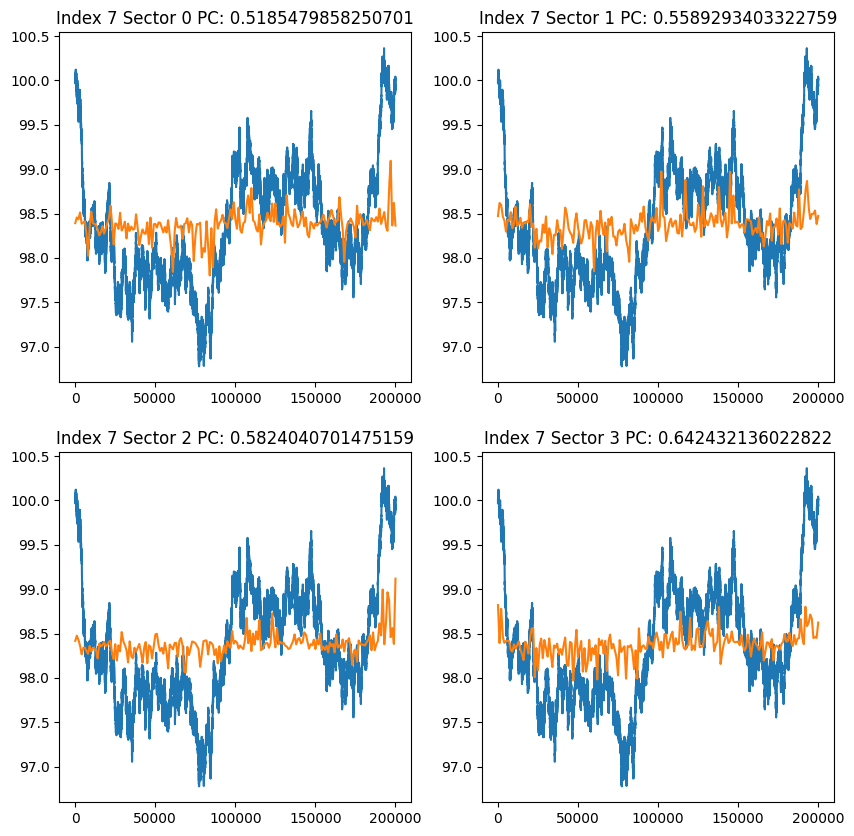

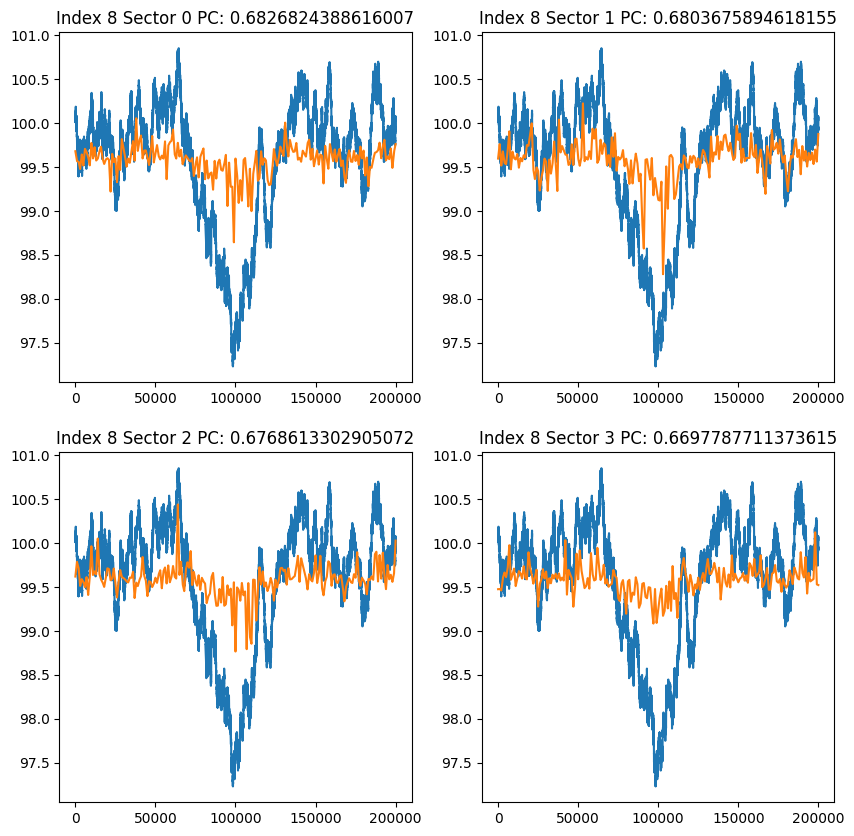

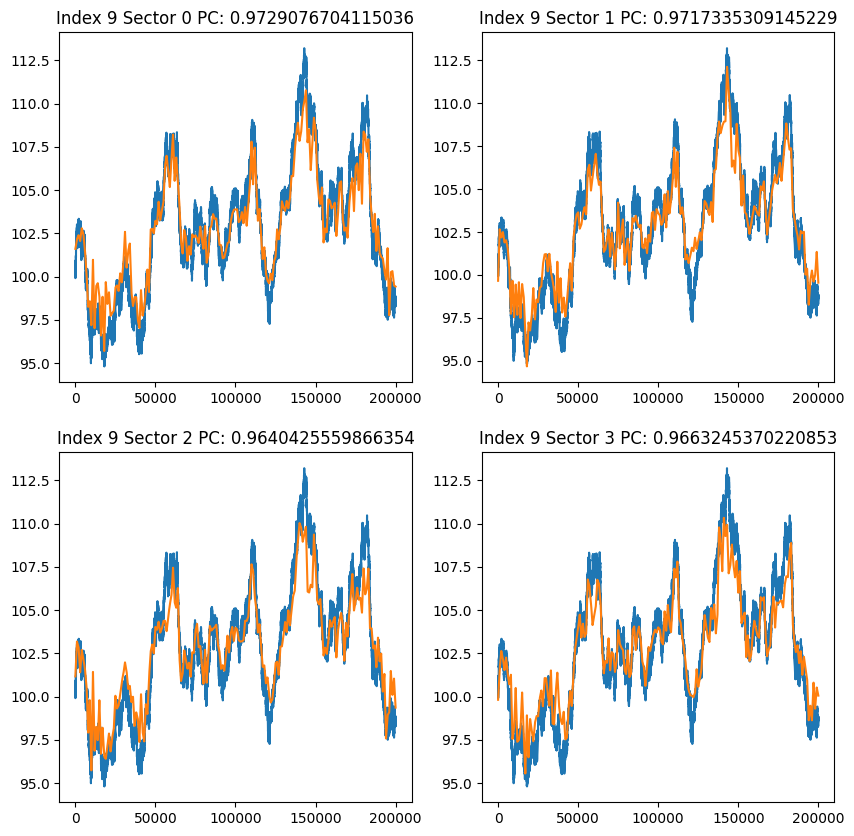

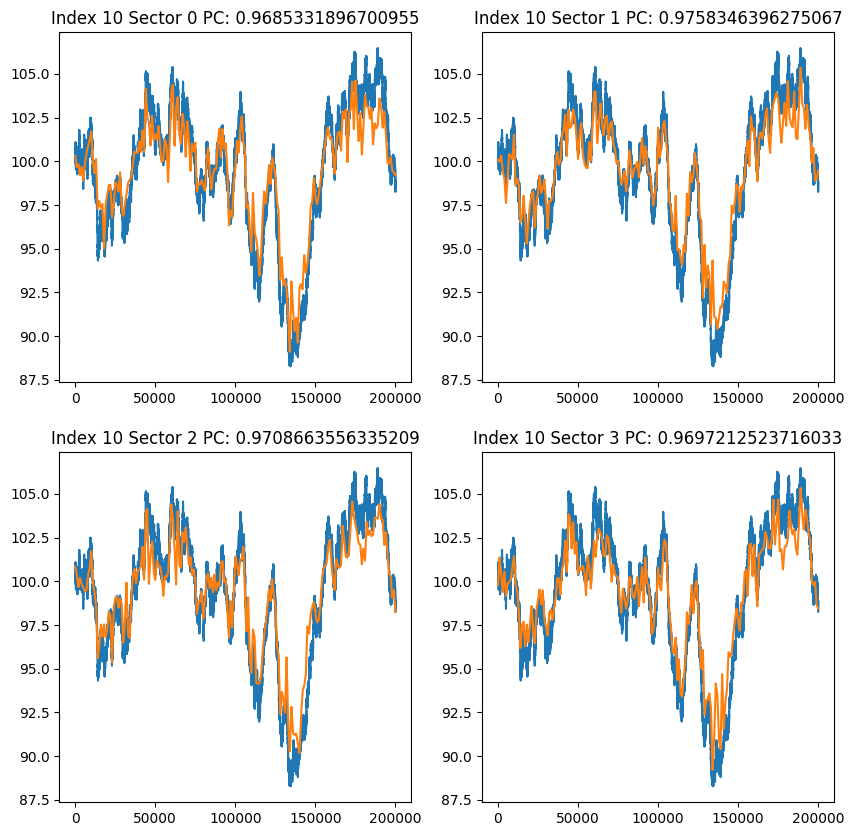

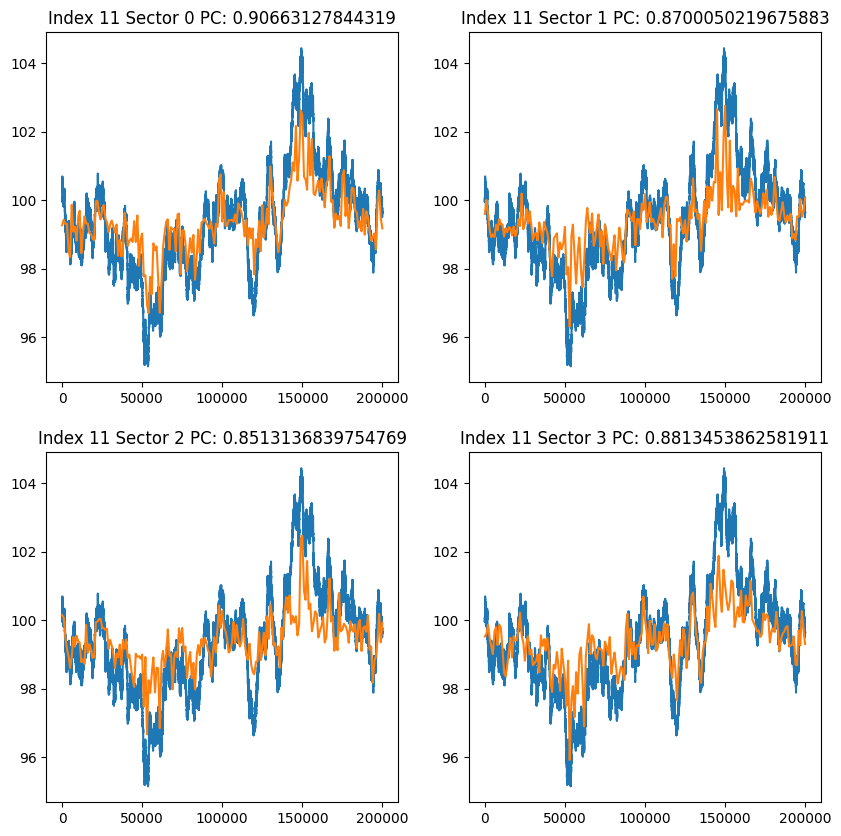

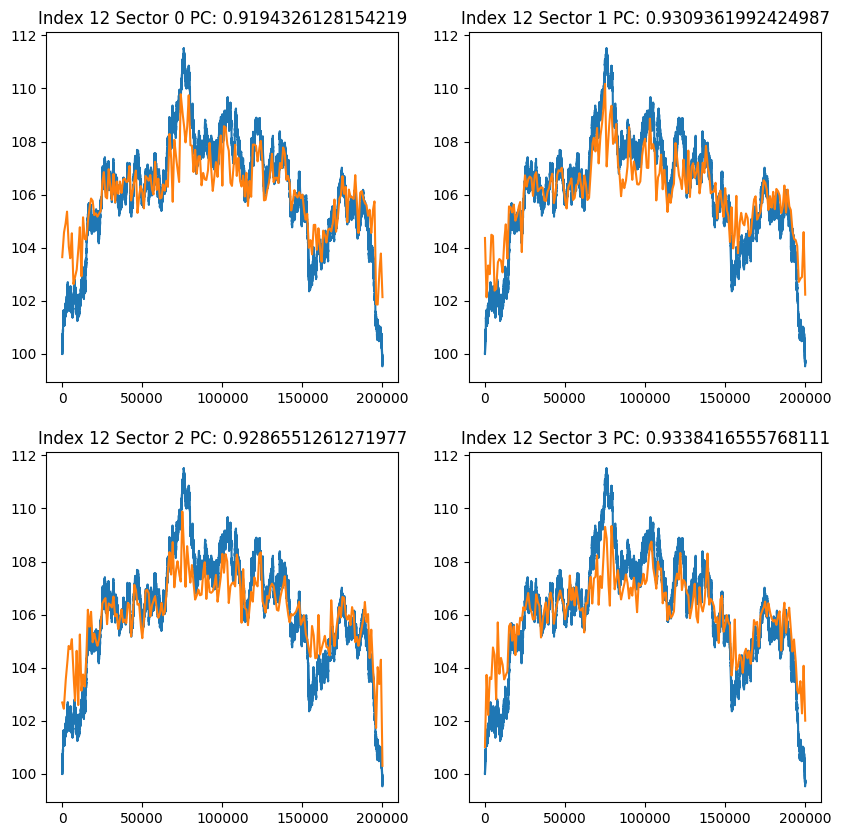

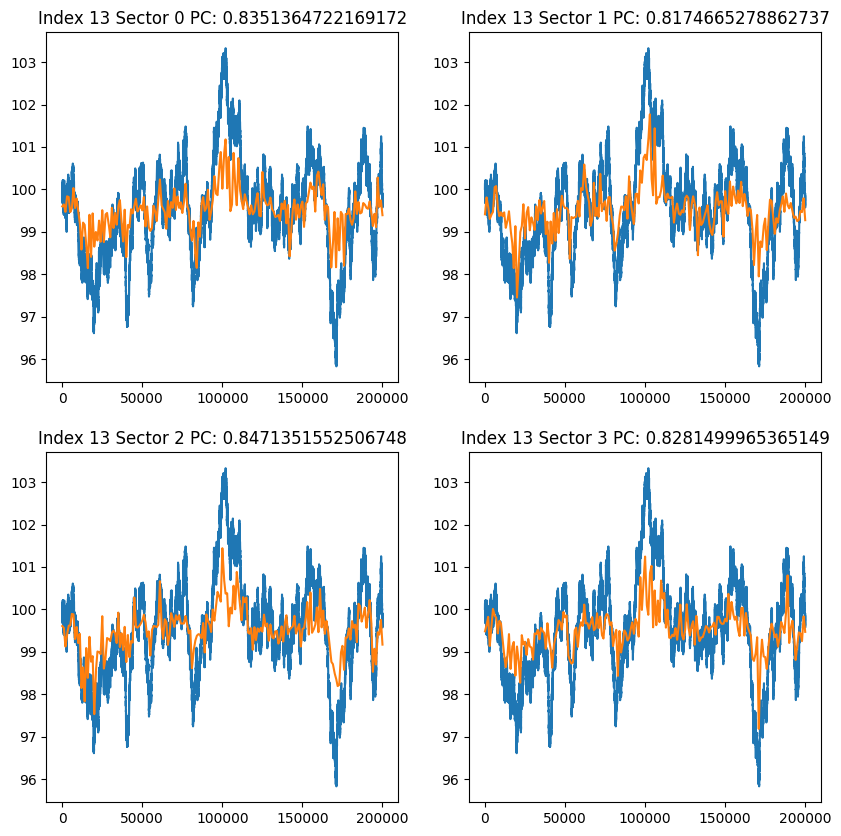

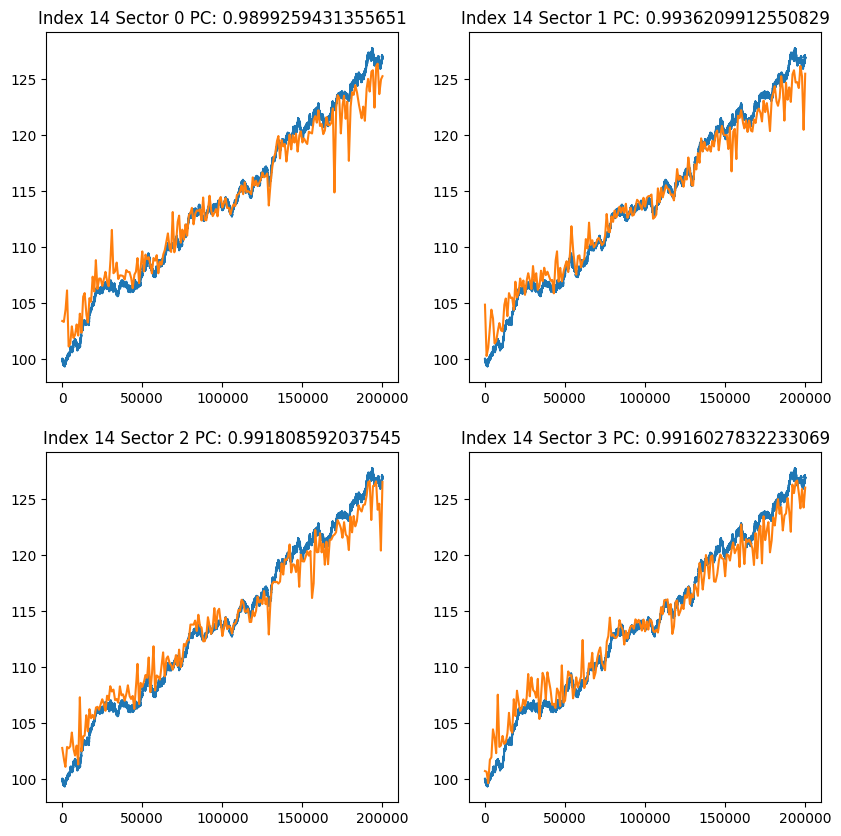

In [95]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import preprocessing
from scipy.interpolate import interp1d
import numpy as np

selected_sec = [0 for i in range(15)]
selected_pred = []
selected_actual = []
for j in range(15):
    temp_pc = []
    temp_pred = []
    fig, axs = plt.subplots(2, 2,figsize=(10,10))
    for i in range(4):
        ind =  np.arange(0, len(sector[i]),1000)
        ind = np.append(ind,len(sector[i])-1)
        scaler = preprocessing.StandardScaler().fit(np.take(sector[i], ind,0))
        X_scaled = scaler.transform(np.take(sector[i], ind,0))

        poly = PolynomialFeatures(degree=3, include_bias=False)
        poly_features = poly.fit_transform(X_scaled)

        #fit polynomial regression model
        # poly_reg_model = linear_model.Lasso(alpha=0.125)
        poly_reg_model = linear_model.Lasso(alpha=0.125, tol=1e-2)
        poly_reg_model.fit(poly_features, indices[j][ind])
        y_predicted = poly_reg_model.predict(poly_features)

        f = interp1d(ind, y_predicted)

        
        if i == 0:
            axs[0,0].plot(indices[j])
            temp_pred.append(f(range(len(sector[i]))))
            axs[0,0].plot(temp_pred[0])
            temp_pc.append(np.corrcoef(f(range(len(sector[i]))),indices[j])[0][1])
            axs[0,0].set_title("Index {} Sector {} PC: {}".format(j,i,temp_pc[0]))
        elif i == 1:
            axs[0,1].plot(indices[j])
            temp_pred.append(f(range(len(sector[i]))))
            axs[0,1].plot(temp_pred[1])
            temp_pc.append(np.corrcoef(f(range(len(sector[i]))),indices[j])[0][1])
            axs[0,1].set_title("Index {} Sector {} PC: {}".format(j,i,temp_pc[1]))
        elif i == 2:
            axs[1,0].plot(indices[j])
            temp_pred.append(f(range(len(sector[i]))))
            axs[1,0].plot(temp_pred[2])
            temp_pc.append(np.corrcoef(f(range(len(sector[i]))),indices[j])[0][1])
            axs[1,0].set_title("Index {} Sector {} PC: {}".format(j,i,temp_pc[2]))
        elif i == 3:
            axs[1,1].plot(indices[j])
            temp_pred.append(f(range(len(sector[i]))))
            axs[1,1].plot(temp_pred[3])
            temp_pc.append(np.corrcoef(f(range(len(sector[i]))),indices[j])[0][1])
            axs[1,1].set_title("Index {} Sector {} PC: {}".format(j,i,temp_pc[3]))

        selected_sec[j] = np.argmax(temp_pc)
    temp_pc = []
    selected_pred.append(temp_pred[selected_sec[j]])
    selected_actual.append(indices[j])
    temp_pred = []



## Calculating the Covariance Matrix of predictions

In [96]:
pred_cov = np.cov(selected_pred)
pred_cov = pd.DataFrame(pred_cov)
pred_cov

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,16.215088,-0.867273,3.517529,6.693053,-8.810181,-55.460471,1.829439,-0.145454,0.070318,-6.387779,-0.816399,-1.697690,0.647029,-0.413420,-21.089829
1,-0.867273,0.166748,-0.090450,-0.495220,0.480921,3.003460,-0.284923,0.012846,0.003510,0.048542,0.051250,0.123308,-0.288118,-0.022828,1.014548
2,3.517529,-0.090450,1.963894,1.537912,-2.497461,-17.921393,-0.007566,-0.012012,-0.010335,-1.839800,-0.478484,-0.226169,-0.326567,-0.128878,-7.086911
3,6.693053,-0.495220,1.537912,8.263984,-6.032192,-26.569389,2.023364,-0.077338,-0.087824,-2.599518,-1.278438,-1.307251,1.657529,0.174270,-10.025871
4,-8.810181,0.480921,-2.497461,-6.032192,11.052175,28.617079,0.462336,0.050430,0.093860,4.580840,-1.998898,1.479249,-0.478421,-0.024557,11.494562
5,-55.460471,3.003460,-17.921393,-26.569389,28.617079,275.000697,-11.388282,0.711625,-0.055346,22.423277,5.523473,6.376085,-2.590395,1.028376,105.506739
6,1.829439,-0.284923,-0.007566,2.023364,0.462336,-11.388282,4.941536,-0.027319,0.022336,1.162384,-3.684756,-0.223250,1.093327,0.261322,-3.695925
7,-0.145454,0.012846,-0.012012,-0.077338,0.050430,0.711625,-0.027319,0.014567,-0.000168,0.021603,-0.039494,0.024406,-0.042691,0.005489,0.262945
8,0.070318,0.003510,-0.010335,-0.087824,0.093860,-0.055346,0.022336,-0.000168,0.022885,-0.007639,-0.003075,-0.010673,-0.056241,-0.018230,-0.037628
9,-6.387779,0.048542,-1.839800,-2.599518,4.580840,22.423277,1.162384,0.021603,-0.007639,8.470549,-1.493753,0.843908,0.641308,0.448739,9.083324


## Trading Strategy

Our trading strategy is as following-

Maximizing the returns with a threshold of the risk of the trading stategy- 
    We imposed the conditions of the allocations being in -1 to 1 and summing to 0 and also capped the risk of the strategy to a
    threshold value. Under these connditions we maximized the return of the trading strategy.
    $$ total\_returns=\sum_{i=1}^{i=15} \alpha_i \cdot returns_i $$


We calculated the optimal allocations for t=0 to t=10000 and then calculated the mean and standard deviations of the returns. Then we calculated the sharpe ratio as mean/standard_devation

1. We assumed the risk of the trading strategy to be less than 10. 
2. For risk calculation we used $\sum_{kxk}$ or the static covariance over the entire data.
3. We calculated our allocations on the predicted values and reported their mean, std, sharpe on using these alocations on the
    actual values.

In [97]:
import scipy.optimize as opt
def neg_tot_returns(weights, returns, cov_matrix):
    negative_return = -np.dot(weights, returns)
    return (negative_return)

def max_returns(returns, cov_matrix, threshold_risk, a_bounds=(-1,1)):
    init_guess = np.random.random(size=(15))
    args = (returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x)-0}, # sum of weights a_i = 0
                   {'type': 'ineq', 'fun': lambda x: threshold_risk - np.squeeze(np.sqrt(np.dot(x,np.dot(cov_matrix,x))))}) # return above a target return
    result = opt.minimize(fun=neg_tot_returns, x0=init_guess,args=args,method='SLSQP',bounds=tuple(a_bounds for _ in range(len(returns))),constraints=constraints,)
    if not result['success']:
         print(result['message'])
    max_return = -result["fun"] # Negative was taken to use minimize function
    efficient_weights = result['x']
    efficient_std = np.squeeze(np.sqrt(np.dot(efficient_weights,np.dot(cov_matrix,efficient_weights))))
    sharpe = max_return/ efficient_std
    
    return (efficient_weights, max_return,efficient_std, sharpe)

In [98]:
selected_pred = np.transpose(selected_pred)
selected_actual = np.transpose(selected_actual)

### Evaluating the Trading Strategy
We evaluated the strategy some fraction of all the days provided

In [99]:
A = []
daily_returns = []
risk_threshold = 10
for i in range(0, 10000):
    a, returns, risk, sharpe = max_returns(selected_pred[i],pred_cov,risk_threshold)
    A.append(a)
    daily_returns.append(np.dot(a,selected_actual[i]))

In [100]:
print("Mean returns (bps):", np.mean(daily_returns))
print("Standard Deviation:", np.std(daily_returns))
print("Sharpe:", np.mean(daily_returns)/np.std(daily_returns))

Mean returns (bps): 13.012514453149045
Standard Deviation: 6.250196405663097
Sharpe: 2.0819368878326503
